Si prega di compilare il modulo (le tue informazioni)
**Please fill in the form (your information)

In [ ]:
#Codice: Esame2-G2-B


#Nome:

#Cognome:

#Matricola:



**Domanda1**: Considera il dataset “digits” di Sklearn e classifica le cifre scritte a mano utilizzando un classificatore Random Forest. Utilizza la convalida incrociata a 5 fold e stampa i risultati medi di accuratezza. Utilizza il 70% dei dati per l’addestramento. Predici le etichette sul set di test, calcola e traccia la matrice di confusione. Traccia l’importanza delle caratteristiche dal modello Random Forest per visualizzare quali caratteristiche sono più significative per la classificazione (10 caratteristiche più importanti). Stampa anche i nomi delle dieci caratteristiche più significative. (10 punti)
============================================================================================================
**Question1:** Consider the "digits" dataset from Sklearn and classify the handwritten digits using a Random Forest classifier. Use 5-fold cross-validation and print the average accuracy results. Use 70% of the data for training. Predict the labels on the test set, compute, and plot the confusion matrix. Plot the feature importance from the Random Forest model to visualize which features are most significant for the classification (Top 10 most important features). Also print the names of the top 10 most significant features. (10 points)

0.9705748434832101


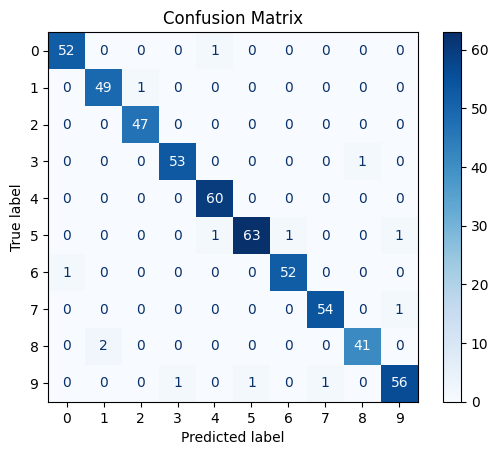

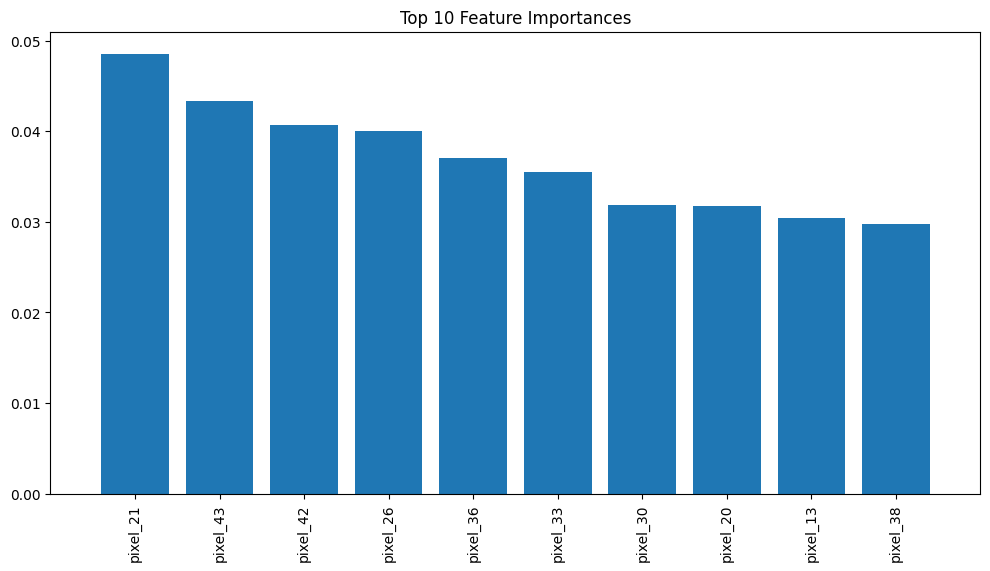

['pixel_21', 'pixel_43', 'pixel_42', 'pixel_26', 'pixel_36', 'pixel_33', 'pixel_30', 'pixel_20', 'pixel_13', 'pixel_38']


In [28]:
import numpy as np
# import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
np.random.seed(42)
# Load the  dataset
digits = load_digits()
# define data and label
X = digits.data
y = digits.target

# Split the dataset into training and text
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

# Define Classifier
rf_clf = RandomForestClassifier()

# Perform Cross Validation
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
#print score
print(np.mean(cv_scores))

# Train the model
rf_clf.fit(X_train, y_train)

# Predict the labels
y_pred = rf_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
# Create feature names as "pixel_0", "pixel_1", ..., "pixel_63"
feature_names = [f'pixel_{i}' for i in range(X.shape[1])]

plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, 10])
plt.show()

# Print the names of the ten most important features
print([feature_names[i] for i in indices])

**Domanda2**: Considera il dataset “make_circles” di Sklearn. Esegui il clustering K-Means (K=2 cluster). Per generare il dataset, utilizza 300 campioni, un fattore di 0.5 e aggiungi rumore con un parametro noise=0.1. Introduci valori mancanti casuali nel 10% del dataset, quindi imputa questi valori mancanti utilizzando il metodo di imputazione della mediana. Esegui il clustering K-Means sia sul dataset originale che su quello con i valori imputati. Traccia i punti dati raggruppati e calcola e traccia i centri dei cluster. Confronta i risultati del clustering con e senza dati mancanti per osservare gli effetti dell’imputazione dei dati. (10 punti)
==============================================================================================================
**Question2:** Consider the "make_circles" dataset from Sklearn. Perform K-Means clustering (K=2 clusters). To generate the dataset, use 300 samples, a factor of 0.5, and add noise with a parameter noise=0.1. Introduce random missing values to 10% of the dataset, then impute these missing values using the median imputation method. Perform K-Means clustering on both the original dataset and the dataset with imputed values. Plot the clustered data points and calculate and plot the cluster centers. Compare the clustering results with and without missing data to observe the effects of data imputation. (10 points)

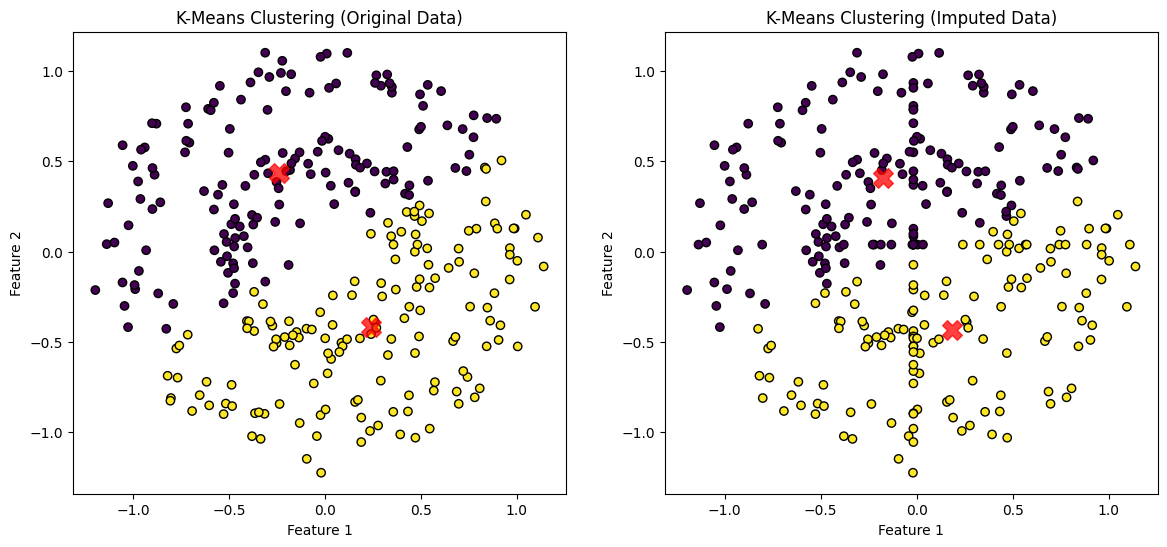

Similarità tra i due clustering (ARI): 0.716
Distanza media tra centroidi: 0.063


In [35]:
#import libraries
from sklearn.datasets import make_circles
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
# Generate make_circles dataset
X, y = make_circles(n_samples=300, factor=.5, noise=.1)

rng = np.random.default_rng(42)
# Introduce random missing values (10% of the data)
missing_mask = rng.random(X.shape)<.1
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# Impute the missing values using the median imputation method
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_missing)


# Perform K-Means clustering on the original dataset
kmeans_original = KMeans(n_clusters=2)
kmeans_original.fit(X)
centers_original = kmeans_original.cluster_centers_
labels_original =kmeans_original.labels_

# Perform K-Means clustering on the dataset with imputed values
kmeans_imputed = KMeans(n_clusters=2)
kmeans_imputed.fit(X_imputed)
centers_imputed = kmeans_imputed.cluster_centers_
labels_imputed = kmeans_imputed.labels_

# Plot the clustered data points and cluster centers for the original dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels_original, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers_original[:,0], centers_original[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the clustered data points and cluster centers for the imputed dataset
plt.subplot(1, 2, 2)
plt.scatter(X_imputed[:,0], X_imputed[:,1], c=labels_imputed, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers_imputed[:,0], centers_imputed[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering (Imputed Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# Compare the clustering results
print(f"Similarità tra i due clustering (ARI): {adjusted_rand_score(labels_original, labels_imputed):.3f}")
print(f"Distanza media tra centroidi: {np.mean(np.linalg.norm(centers_original - centers_imputed, axis=1)):.3f}")


**Domanda3**: Considera il dataset "iris" di Sklearn. Determina il numero ottimale di cluster (K) utilizzando l'algoritmo di clustering K-Means. Imposta valori di K che vanno da 1 a 10, calcola la somma dei quadrati dei cluster (inertia o SSE) e il punteggio silhouette per ciascun K. Traccia i valori di inertia e i punteggi silhouette rispetto al numero di cluster (K) e identifica il valore di K ottimale basato sul punteggio silhouette e inertia. (10 punti)
==============================================================================================================
**Question3:** Consider the "iris" dataset from Sklearn. Determine the optimal number of clusters (K) using the K-Means clustering algorithm. Set K values ranging from 1 to 10, compute the cluster sum of squares (inertia) and the silhouette score for each K. Plot the inertia values and silhouette scores against the number of clusters (K), and identify the optimal K based on the silhouette score and inertia. (10 points)

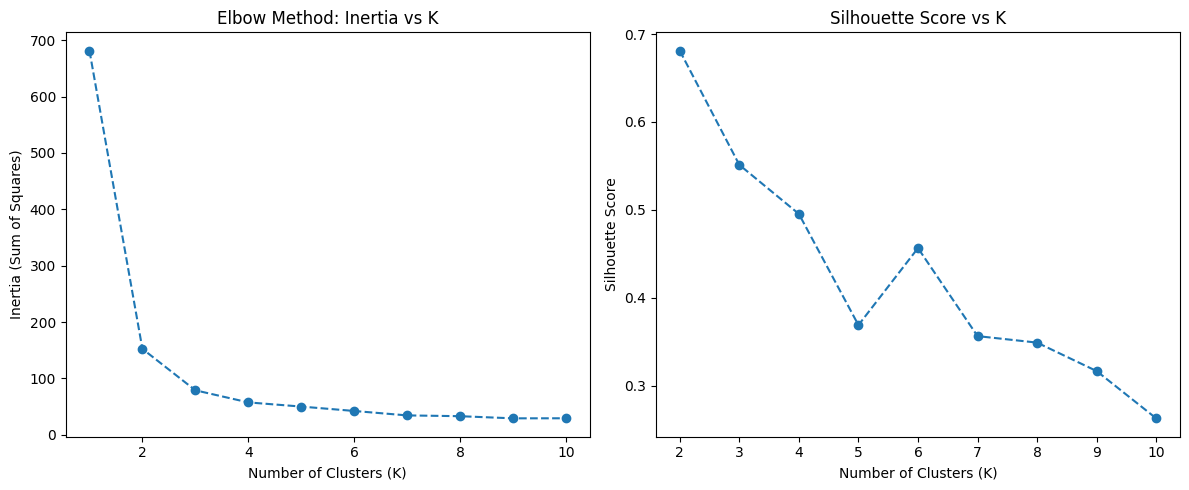

The optimal K is: 2


In [43]:
#import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
# Load the iris dataset and define data
iris = load_iris()
X = iris.data

# Range of K values to test
K_range = range(1,11)
inertia_values = []
silhouette_scores = []

# Compute inertia and silhouette score for each K
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    if k > 1:
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
    else:
        silhouette_scores.append(np.nan)

# Plot the inertia values against the number of clusters (K)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squares)')
plt.title('Elbow Method: Inertia vs K')

# Plot the silhouette scores against the number of clusters (K)
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores[1:], marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')

plt.tight_layout()
plt.show()

# what is optimal K?
optimal_K = np.argmax(silhouette_scores[1:]) + 2
print(f'The optimal K is: {optimal_K}')

# explain why this k is chosen as the optimal (spiegare perché questo k è scelto come ottimale)
